In [36]:
# loading libraries
import librosa   #for audio processing
import librosa.display
import wave
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from scipy.io import wavfile as wav #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Creating a file path for a single audio file

path = '../data/train/wav/tr_101_tr02001.wav'

In [12]:
# Finding the audio and sample rate using librosa

audio , sample_rate = librosa.load(path)

The sample rate using librosa is:  22050


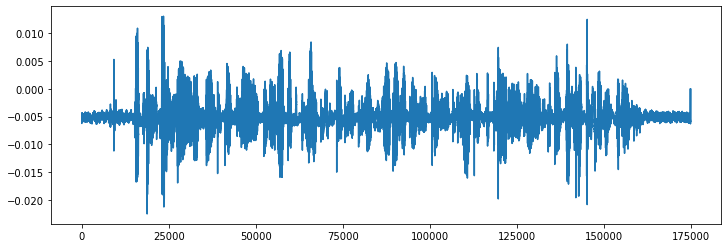

In [17]:
# Lets see the audio array and sample rate

print(f'The sample rate using librosa is: ', sample_rate)
plt.figure(figsize=(12,4))
plt.plot(audio)
plt.show()

##### Here we can observe that eventhough our audio was sterio librosa will change it to mono

In [19]:
# Lets use the scipy to load the data 

wave_sample_rate , wave_audio = wav.read(path)

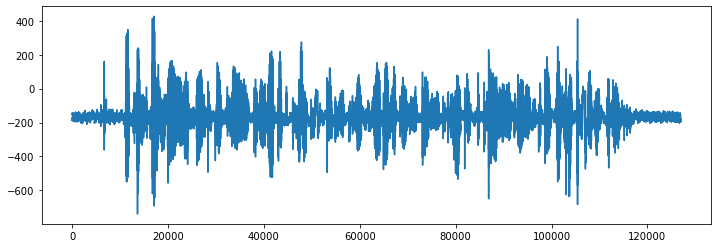

In [24]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)
plt.show()

### Extracting features
##### Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [31]:
# Lets use librossa to extract the features

mfccs = librosa.feature.mfcc(y=audio)
print(mfccs.shape)

(20, 342)


In [34]:
mfccs = librosa.feature.mfcc(y=audio,n_mfcc=40) # Lets increase the number of features from 20 to 40
print(mfccs.shape)

(40, 342)


In [41]:
def features_extractor(path):
    audio, _ = librosa.load(path, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features